In [630]:
## functions:
#calculate the workload of nodes  the betweeness of a node and set the weight to that
#calculate the betweeness of nodes 
#delete the node with the max betweeness or random
#keep number of connected componets and the number of nodes in the biggest component in list so that we can plot it
#distribute the weights of the deleted node to its neighbours
#repeat steps until the number of nodes in biggest connected component is below 50% or some other criteria



In [631]:
import pandas as pd
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import powerlaw as pl
import random
#Loading the data
G=nx.read_gml('power.gml', label='id')


In [632]:
##We calculate the betweeness centrality of nodes and set the weights accordig to the most important ones
pagerank = nx.pagerank(G)
p_arr = np.array([pagerank[v] for v in G.nodes])
workload=p_arr
max_work=workload*2

In [633]:
##The over_load function deletes the overloaded node and checks for other overloaded nodes
def del_node(node):
    neighbors_list = list(nx.neighbors(G, node))
    extra_weight=workload[node]/len(neighbors_list)
    workload[node]=0
    G.remove_node(node)
    for nodes in neighbors_list:
        workload[nodes]=workload[nodes]+extra_weight
        if workload[nodes]>max_work[nodes]:
            if nodes in G:
                del_node(nodes)
        


In [634]:
def max_node():
    #We find the node with highest centrality(the one we are going to delete)
    pagerank = nx.pagerank(G)
    max_node = max(pagerank, key = pagerank.get)

    del_node(max_node)





    

In [635]:
def random_node():
    r_node = random.choice(list(G.nodes))
    del_node(r_node)
    


C:\Users\luka1\AppData\Local\Temp\ipykernel_3384\1291347243.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  extra_weight=workload[node]/len(neighbors_list)


The graph collapsed after  713 the biggest connected component had less then 50% of nodes after 195


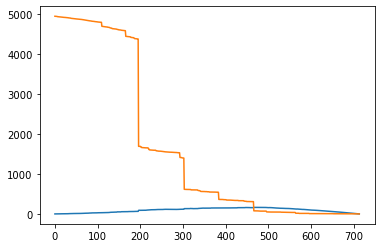

In [636]:
colapse_nr_of_nodes=len(G.nodes())/2
n_components=[]
n_nodes=[]
def plotting():
    x=nx.number_connected_components(G)
    n_components.append(x)
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    y=G0.number_of_nodes()
    n_nodes.append(y)
    random_node()

n=[]
for i in range(1000):
    plotting()
    n.append(i)
    if len(G.nodes())!= 0:
        if n_nodes[i]>colapse_nr_of_nodes:
            z=i
    else:
        print("The graph collapsed after ",i,'the biggest connected component had less then 50% of nodes after',z)
        break


plt.plot(n,n_components)
plt.plot(n,n_nodes)

    